In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, e, pi, m_e, epsilon_0, hbar
from synchrad.calc import SynchRad
from compute_rad import E_0

### Plot full energy spectrum (along the axis)

<IPython.core.display.Javascript object>


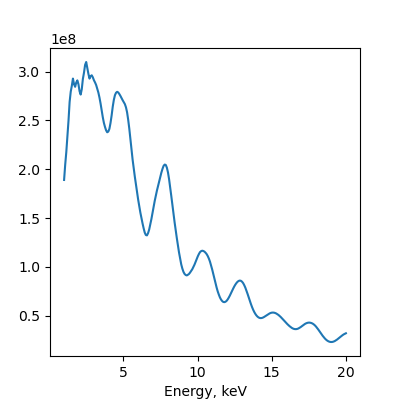

In [4]:
calc = SynchRad(file_spectrum="./spectrum.h5")

plt.figure(figsize=(4,4))
# x = calc.get_spectral_axis()[:]
x = calc.Args['omega'][:]
y = calc.get_full_spectrum()[:,0,0]
    
x = np.array(x)
y = np.array(y)
plt.plot(x*E_0*1e-3, y)
plt.xlabel(r'Energy, keV')

plt.show()

### Plot energy spectrum (integrated) with x-axis in Hz

<IPython.core.display.Javascript object>


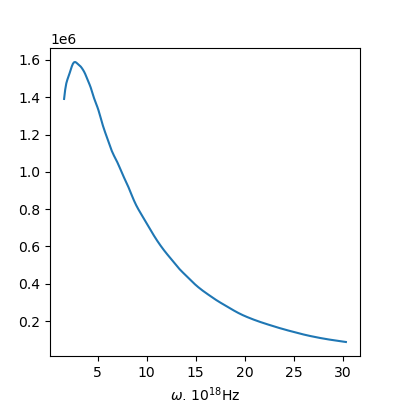

/home/andriyash/miniconda3/lib/python3.7/site-packages/synchrad/utils.py:186: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'wavelengthGrid' in self.Args['Features']:


In [5]:
calc = SynchRad(file_spectrum="./spectrum.h5")
omega_0 = 2*pi*c        #frequency of electron with wavelength=1m

plt.figure(figsize=(4,4))
x = calc.get_spectral_axis()[:]
y = calc.get_energy_spectrum()[:]
    
x = np.array(x)
y = np.array(y)
plt.plot(x*omega_0*1e-18, y)
plt.xlabel(r'$\omega$, $10^{18}$Hz')

plt.show()

### Plot spectrum in FREQUENCY (in eV) vs THETA coordinates 
##### (slice along PHI)

<IPython.core.display.Javascript object>


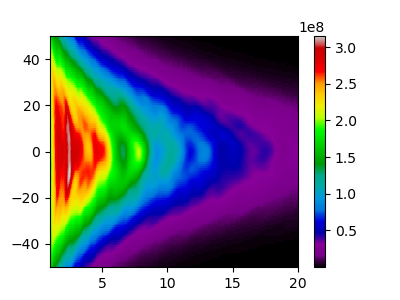

In [32]:
plt.figure(figsize=(4,3))

i_phi = 8
val = calc.get_full_spectrum()
val = np.c_[val[:,:,i_phi][:,::-1], val[:,:,i_phi + val.shape[-1]//2 - 1]]

ext = np.array([calc.Args['omega'].min(), calc.Args['omega'].max(), -calc.Args['theta'].max(), calc.Args['theta'].max()])
ext[:2] *= E_0 * 1e-3
ext[2:] *= 1e3

plt.imshow(val.T, origin='lower', aspect='auto', 
           cmap=plt.cm.nipy_spectral, interpolation='nearest', extent=ext, )

plt.colorbar()

### Calculate and plot radiated energy VS slice #

<IPython.core.display.Javascript object>


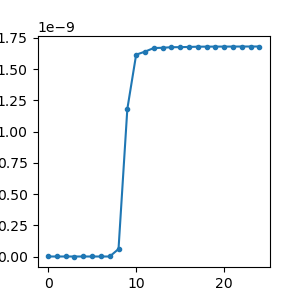

In [30]:
nrg = np.array([calc.get_energy(lambda0_um=1e6, iteration=it) for it in range(calc.snap_iterations.size)])

plt.figure(figsize=(3,3))
plt.plot(nrg, '.-')

### Plot electron radiation in SOLID ANGLE

<IPython.core.display.Javascript object>


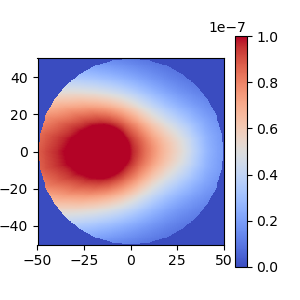

In [34]:
spots = np.zeros((calc.snap_iterations.size, 200,200))

for it in range(calc.snap_iterations.size):
    spots[it], extent = calc.get_spot_cartesian(bins=(200,200), lambda0_um=1e6, iteration=it)
    

d_spots = spots[1:] - spots[:-1]

plt.figure(figsize=(3,3))
plt.imshow(d_spots[9].T, extent=extent*1e3, cmap=plt.cm.coolwarm, interpolation='nearest', vmax=1e-7)
plt.colorbar()